<a href="https://colab.research.google.com/github/Ruthmwaura/week2_core_ip/blob/main/BANK_ACCOUNT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Of Bank Account In East Africa Explanatory Data Analysis

We will figure out how we can predict which individuals are most likely to have or use a bank account. The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

##1. Defining the question

##a) Specifying the Data Analytic Question

Finding a way to predict which individuals are most likely to have or use a bank account

##b) Defining the Metric for Success

Performing univariate, bivariate and multivariate analysis recording observations to predict individuals who are most likely to have or use a bank account.

##c) Understanding the context
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.


##d) Recording the Experimental Design

To successfully conduct this project the following steps will be taken in order:

-clean data

-Conduct univariate, Bivariate, and multi-variate analysis

-solution implementation

-challenge the solution
 

##1. Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

##2. Data preparation and cleaning

  a.load the data

  b.get more information about data and columns

  b.checking for outliers

  c.fix any missing or incorrect values

In [ ]:
#loading the data
financial_df=pd.read_csv('http://bit.ly/FinancialDataset')
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#loading the definition dataset

definitions_df=pd.read_csv('http://bit.ly/VariableDefinitions')
definitions_df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
#checking number of columns and rows
financial_df.shape

(23524, 13)

In [ ]:
#renaming columns
financial_df.rename(columns={'The relathip with head':'The relationship with head','country':'Country','year':'Year','uniqueid':'Unique Id','household_size':'Household size','gender_of_respondent':'Gender of Respondent','marital_status':'Marital Status'}, inplace=True)
financial_df.head(3)

,Country,Year,Unique Id,Has a Bank account,Type of Location,Cell Phone Access,Household size,Respondent Age,Gender of Respondent,The relationship with head,Marital Status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [ ]:
financial_df.drop('Unique Id',inplace=True, axis=1)

In [ ]:
#checking data types
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     23510 non-null  object 
 1   Year                        23524 non-null  int64  
 2   Has a Bank account          23488 non-null  object 
 3   Type of Location            23509 non-null  object 
 4   Cell Phone Access           23513 non-null  object 
 5   Household size              23496 non-null  float64
 6   Respondent Age              23490 non-null  float64
 7   Gender of Respondent        23490 non-null  object 
 8   The relationship with head  23520 non-null  object 
 9   Marital Status              23492 non-null  object 
 10  Level of Educuation         23495 non-null  object 
 11  Type of Job                 23494 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.2+ MB


In [ ]:
#the summary statistic of every numerical column
financial_df.describe()


,Year,Household size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
#checking for missing values

financial_df.isna().sum().sort_values(ascending=False)

Has a Bank account            36
Respondent Age                34
Gender of Respondent          34
Marital Status                32
Type of Job                   30
Level of Educuation           29
Household size                28
Type of Location              15
Country                       14
Cell Phone Access             11
The relationship with head     4
Year                           0
dtype: int64

In [ ]:
#dealing with missing values
#we will drop all the missing values
financial_df.dropna(inplace=True)



In [ ]:
#confirming if they have been dropped
financial_df.isna().sum().sort_values(ascending=False)

Country                       0
Year                          0
Has a Bank account            0
Type of Location              0
Cell Phone Access             0
Household size                0
Respondent Age                0
Gender of Respondent          0
The relationship with head    0
Marital Status                0
Level of Educuation           0
Type of Job                   0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


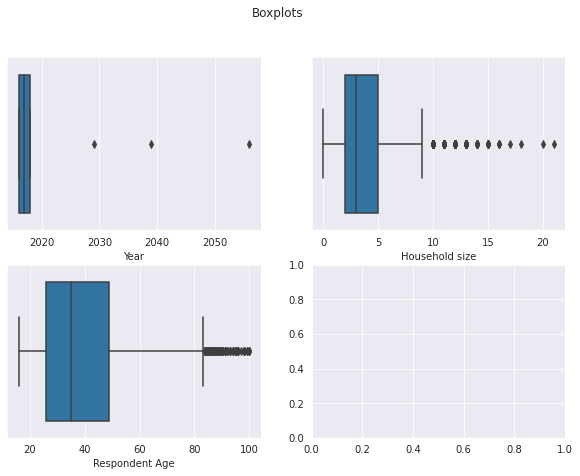

In [ ]:
#checking for outliers
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(financial_df['Year'], ax=ax1)
sns.boxplot(financial_df['Household size'], ax=ax2)
sns.boxplot(financial_df['Respondent Age'], ax=ax3)

plt.show()


we have outliers in the three numerical categories

In [ ]:
#removing the outliers
#in the year column
indexnames = financial_df[financial_df['Year'] > 2018].index

financial_df.drop(indexnames, inplace = True)

In [ ]:
#in the column household size
indexnames = financial_df[financial_df['Household size'] > 10].index

financial_df.drop(indexnames, inplace = True)

In [ ]:
#in the column respondent age
indexnames = financial_df[financial_df['Respondent Age'] > 81].index

financial_df.drop(indexnames, inplace = True)

In [ ]:
from pandas._libs.hashtable import value_count
for cols in  financial_df.columns:
  print(financial_df[cols].unique())


['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
[2018 2016 2017]
['Yes' 'No']
['Rural' 'Urban']
['Yes' 'No']
[ 3.  5.  8.  7.  1.  6.  4. 10.  2.  9.  0.]
[24. 70. 26. 34. 32. 42. 54. 76. 40. 69. 64. 31. 38. 47. 27. 48. 25. 21.
 18. 22. 58. 55. 62. 29. 35. 45. 67. 19. 80. 66. 50. 33. 28. 51. 16. 17.
 30. 37. 59. 65. 46. 56. 52. 23. 43. 49. 44. 72. 53. 63. 39. 81. 78. 36.
 20. 60. 71. 57. 68. 41. 61. 75. 73. 74. 77. 79.]
['Female' 'Male']
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']


We have some anomalities on the column Level of Educuation



In [ ]:
#removing the anomalities
indexnames = financial_df[financial_df['Level of Educuation'] =='6'].index

financial_df.drop(indexnames, inplace = True)

In [ ]:
#checking 
financial_df['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

##3. Explanatory analysis and visualization

###univariate

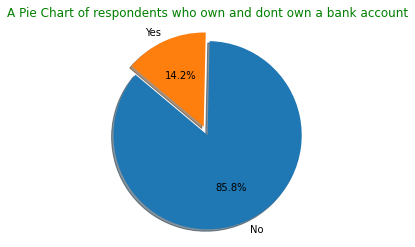

In [ ]:
#plotting a pie chart for "Has Account "
#grouping the data
Account=financial_df['Has a Bank account'].value_counts()
Account

#creating labels
Labels= Account.index
Labels

#values
Data = Account.values
Data


plt.pie(Data, labels = Labels, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 140)
plt.axis('equal')
plt.title('A Pie Chart of respondents who own and dont own a bank account', color = 'green')
plt.show()


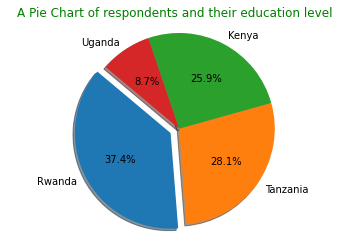

In [ ]:
#plotting a pie chart for "Country"
#grouping the data
country=financial_df['Country'].value_counts()
country

#creating labels
Labels= country.index
Labels

# #values
Data = country.values
Data


plt.pie(Data, labels = Labels, autopct = '%1.1f%%', shadow = True, explode = (0.1,0,0,0,), startangle = 140)
plt.axis('equal')
plt.title('A Pie Chart of respondents and their education level', color = 'green')
plt.show()


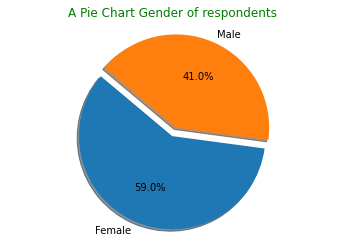

In [ ]:

#plotting a pie chart for "Gender of Respondent"
#grouping the data
Gender=financial_df['Gender of Respondent'].value_counts()
Gender

#creating labels
Labels= Gender.index
Labels

# #values
Data = Gender.values
Data


plt.pie(Data, labels = Labels, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 140)
plt.axis('equal')
plt.title('A Pie Chart Gender of respondents ', color = 'green')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


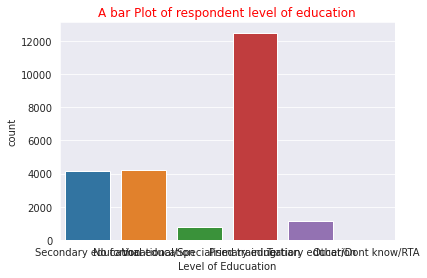

In [ ]:
#plotting bar chart for 'Level of Educuation'
sns.set_style('darkgrid')
sns.countplot(financial_df['Level of Educuation'])
plt.title('A bar Plot of respondent level of education', color = 'red')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


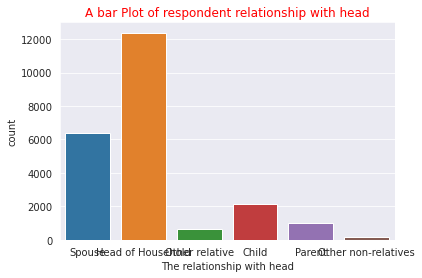

In [ ]:
#plotting a bar chart 'The relationship with head'
sns.set_style('darkgrid')
sns.countplot(financial_df['The relationship with head'])
plt.title('A bar Plot of respondent relationship with head', color = 'red')
plt.show()

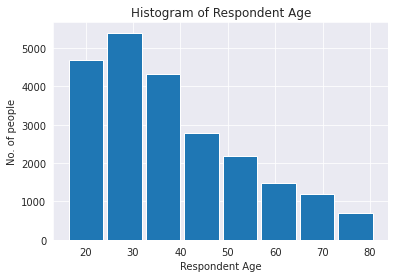

In [ ]:
#plotting a histogram to show Respondent Age
Age = financial_df['Respondent Age']


plt.hist(Age, bins=8, histtype='bar', rwidth=0.9)
plt.xlabel('Respondent Age')
plt.ylabel('No. of people')
plt.title('Histogram of Respondent Age')
plt.show()


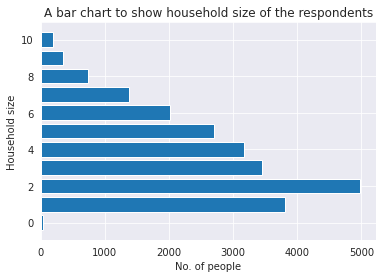

In [ ]:
#plotting a bar graph to show Household size
Household = financial_df['Household size'].value_counts()


#creating labels
Labels= Household.index
Labels

# #values
Data = Household.values
Data


plt.barh(Labels, Data)
plt.ylabel('Household size')
plt.xlabel('No. of people')
plt.title('A bar chart to show household size of the respondents')
plt.show()

In [ ]:
#creating a frequency table of type of location
Location = pd.crosstab(index = financial_df['Type of Location'], columns = 'count')
Location

col_0,count
Type of Location,
Rural,13898
Urban,8920


###measure of central tendancy

In [ ]:
#respondent age
#mean
mean=financial_df['Respondent Age'].mean()
print(mean)

#mode
mode=financial_df['Respondent Age'].mode()
print(mode)

#median
median=financial_df['Respondent Age'].median()
print(median)

38.16644754141467
0    30.0
dtype: float64
35.0


mean=38
mode=30
median=35

The distribution is not symmetrical

In [ ]:
#Household size
#mean
mean=financial_df['Household size'].mean()
print(mean)

#mode
mode=financial_df['Household size'].mode()
print(mode)

#median
median=financial_df['Household size'].median()
print(median)

3.6378736085546497
0    2.0
dtype: float64
3.0


mean=3 mode=2 median=3


The distribution is symmetrical

###Measures of Dispersion/Variability/Spread

In [ ]:
#respondent age
#range
Max = financial_df['Respondent Age'].max()
Min = financial_df['Respondent Age'].min()
Range = Max - Min
print(Range)
#quartiles
Q=financial_df['Respondent Age'].quantile([0.25,0.5,0.75])
print(Q)
#standard deviation
Stdv=financial_df['Respondent Age'].std()
print(Stdv)
#variance
Vr=financial_df['Respondent Age'].var()
print(Vr)
#skweness
Sk=financial_df['Respondent Age'].skew()
print(Sk)
#kurtosis
Krt=financial_df['Respondent Age'].kurt()
print(Krt)

65.0
0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent Age, dtype: float64
15.61891379610363
243.95046817011632
0.7210787263606736
-0.2796850841081091


range=65.0

first quartile=26.0

second quartile=35.0

third quartile=48.0

standard deviation=15.61891379610363
this is high std dev, showing that the age of respondents are not hghly concentrated around the mean.

variance=243.95046817011632
this is a very high variance compared to the mean of 38. This indicates that the age values are highly spread out


skewness=0.7210787263606736
the data has a positive skewness, meaning it has a right longer tail

kurtosis=-0.27968508410810
this value is close to zero meaning mesokurtic distributions, or a normal distribution is assumed.

In [ ]:
#household size
#range
Max = financial_df['Household size'].max()
Min = financial_df['Household size'].min()
Range = Max - Min
print(Range)
#quartiles
Q=financial_df['Household size'].quantile([0.25,0.5,0.75])
print(Q)
#standard deviation
Stdv=financial_df['Household size'].std()
print(Stdv)
#variance
Vr=financial_df['Household size'].var()
print(Vr)
#skweness
Sk=financial_df['Household size'].skew()
print(Sk)
#kurtosis
Krt=financial_df['Household size'].kurt()
print(Krt)

10.0
0.25    2.0
0.50    3.0
0.75    5.0
Name: Household size, dtype: float64
2.1528434800594813
4.634735049634619
0.6867011491203027
-0.25600545162690747


range=10.0

first quartile=2.0

second quartile=3.0

thirdquartile=5.0

standard deviation=2.1528434800594813
this is a low std dev, showing that the age of respondents are not hghly concentrated around the mean.

variance=4.634735049634619
this is not a high variance compared to the mean of 3. This indicates that the household size values are not spread out

skewness=0.6867011491203027
he data has a positive skewness, meaning it has a right longer tail

kurtosis=-0.25600545162690747
this value is close to zero meaning mesokurtic distributions, or a normal distribution is assumed

###bivariate

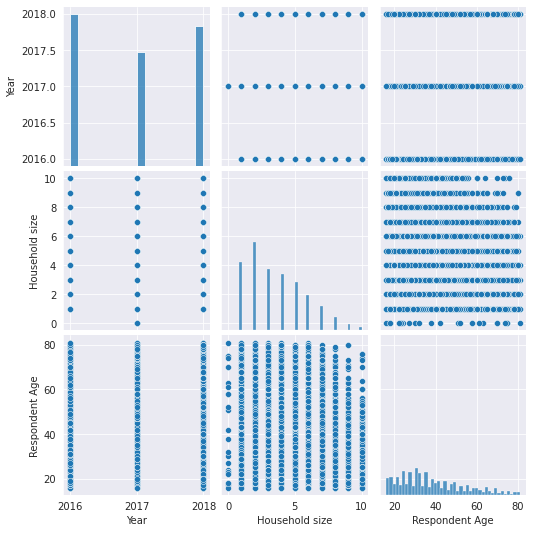

In [ ]:
#plotting a pairplot
sns.pairplot(financial_df)
plt.show()

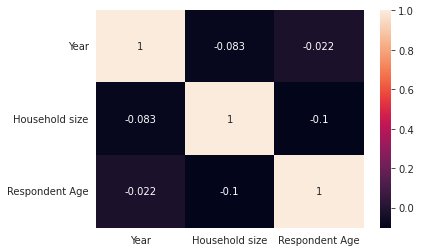

In [ ]:
#plotting a heatmap
sns.heatmap(financial_df.corr(),annot=True)
plt.show()

all the variables has no correlation with each other but household and respondent age has a very weak negative correlation

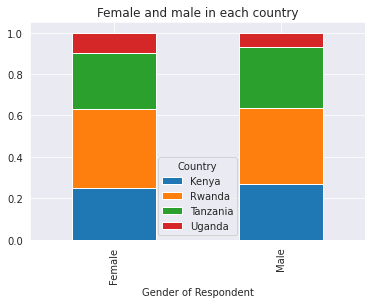

In [ ]:
#plotting stacked bar
df=financial_df.groupby('Gender of Respondent').Country.value_counts(normalize=True)
df.unstack().plot(kind='bar', stacked=True)
plt.title('Female and male in each country')
plt.show()

In [ ]:
#selecting first 100 rows in each column
df1 = financial_df.iloc[0:50] 
df1.head()

,Country,Year,Has a Bank account,Type of Location,Cell Phone Access,Household size,Respondent Age,Gender of Respondent,The relationship with head,Marital Status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


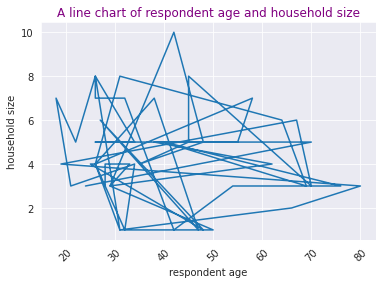

In [ ]:
age=df1['Respondent Age']
Household=df1['Household size']


plt.plot(age, Household)
plt.xticks(rotation = 45)
plt.title('A line chart of respondent age and household size', color = 'purple')
plt.xlabel('respondent age')
plt.ylabel('household size')
plt.show()

In [ ]:
#z test
#H0=the mean of respondent age is 38
#HA=the mean of respondent age is >38


###Multivariate

principle component *analysis*

In [ ]:
# creating a dummy dataframe where we replace entries of all categorical data with ones and zeros

Dummy_df= pd.get_dummies(financial_df[['Country', 'Type of Location', 'Has a Bank account', 'Cell Phone Access', 'Gender of Respondent','The relationship with head', 'Marital Status', 'Level of Educuation', 'Type of Job']])
Dummy_df.head()

,Country_Kenya,Country_Rwanda,Country_Tanzania,Country_Uganda,Type of Location_Rural,Type of Location_Urban,Has a Bank account_No,Has a Bank account_Yes,Cell Phone Access_No,Cell Phone Access_Yes,...,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# concatenating the two dataframes

df4 = pd.concat([financial_df, Dummy_df], axis = 1)
df4.head()

,Country,Year,Has a Bank account,Type of Location,Cell Phone Access,Household size,Respondent Age,Gender of Respondent,The relationship with head,Marital Status,...,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,...,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,...,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,...,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,...,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#dividing the dataset into a feature set and corresponding labels
x=df4.drop(columns = ['Country','Has a Bank account','Type of Location','Cell Phone Access','Household size','Respondent Age','Gender of Respondent','The relationship with head','Marital Status', 'Level of Educuation', 'Type of Job'], axis = 1)
y=df4['Has a Bank account']

df4.columns

Index(['Country', 'Year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'Household size', 'Respondent Age',
       'Gender of Respondent', 'The relationship with head', 'Marital Status',
       'Level of Educuation', 'Type of Job', 'Country_Kenya', 'Country_Rwanda',
       'Country_Tanzania', 'Country_Uganda', 'Type of Location_Rural',
       'Type of Location_Urban', 'Has a Bank account_No',
       'Has a Bank account_Yes', 'Cell Phone Access_No',
       'Cell Phone Access_Yes', 'Gender of Respondent_Female',
       'Gender of Respondent_Male', 'The relationship with head_Child',
       'The relationship with head_Head of Household',
       'The relationship with head_Other non-relatives',
       'The relationship with head_Other relative',
       'The relationship with head_Parent',
       'The relationship with head_Spouse',
       'Marital Status_Divorced/Seperated', 'Marital Status_Dont know',
       'Marital Status_Married/Living together',
       'Marital

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [ ]:
#normalizing our feature set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#Performing PCA using Scikit-Learn
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [ ]:
#variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.09851316, 0.08392808, 0.0685809 , 0.05366196, 0.05146146,
       0.04873757, 0.04011151, 0.03682179, 0.03488109, 0.0327192 ,
       0.0311965 , 0.02827602, 0.0268393 , 0.02609454, 0.02569649,
       0.02492842, 0.024822  , 0.02441431, 0.02404737, 0.02387189,
       0.02359255, 0.02293985, 0.0224168 , 0.02095356, 0.0197883 ,
       0.01898568, 0.01617639])

In [ ]:
# Using the 24 Principal Components to train our algorithm
 
from sklearn.decomposition import PCA

pca = PCA(n_components=24)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
# Training and and Making Predictions 
# Here we use random forest classification for making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(x_train, y_train)

# predicting the Test set results

y_pred = classifier.predict(x_test)

In [ ]:
# Performing evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3924    1]
 [ 577   67]]
Accuracy 0.8734952943751368


Linear Discriminant Analysis (LDA)

In [ ]:
# Divide dataset into features (f) and corresponding labels (l)
f = df4.iloc[:, 12:].values
l = df4.iloc[:, 2].values

In [ ]:
#Divide data into training and test sets

from sklearn.model_selection import train_test_split

f_train, f_test, l_train, l_test = train_test_split(f, l, test_size=0.2, random_state=0)

In [ ]:
# Performing feature scaling. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
f_train = sc.fit_transform(f_train)
f_test = sc.transform(f_test)

In [ ]:
# Performing LDA with Scikit-Learn. 


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=22)
f_train = lda.fit_transform(f_train, l_train)
f_test = lda.transform(f_test)

ValueError: ignored

In [ ]:
# Training and Making Predictions
# Using random forest classifier to evaluate the performance
# 

from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier(max_depth=2, random_state=0)
classifier1.fit(f_train, l_train)

# # predicting the Test set results

l_pred = classifier1.predict(f_test)

In [ ]:
# Evaluating the Performance of the algorithm
# Using a confusion matrix and the accuracy score.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm1 = confusion_matrix(l_test, l_pred)
print(cm1)
print('Accuracy' + str(accuracy_score(l_test, l_pred)))


multiple regression

In [ ]:
from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [ ]:
# Binary encoding our Target variable
# since it has two categories (yes/no)

df4['bank'] = df4['Has a Bank account'].map( {'Yes':1, 'No':0} )
df4[['bank', 'Has a Bank account']]


,bank,Has a Bank account
0,1,Yes
1,0,No
2,1,Yes
3,0,No
4,0,No
...,...,...
23519,0,No
23520,0,No
23521,0,No
23522,0,No


In [ ]:
# Confirming that we have no anomalies and null values in the new column created
#

df4.bank.unique()

df4.isnull().sum()

Country                                                0
Year                                                   0
Has a Bank account                                     0
Type of Location                                       0
Cell Phone Access                                      0
Household size                                         0
Respondent Age                                         0
Gender of Respondent                                   0
The relationship with head                             0
Marital Status                                         0
Level of Educuation                                    0
Type of Job                                            0
Country_Kenya                                          0
Country_Rwanda                                         0
Country_Tanzania                                       0
Country_Uganda                                         0
Type of Location_Rural                                 0
Type of Location_Urban         

In [ ]:
# Describing our data

df4.info()
df4.describe()
df4.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22818 entries, 0 to 23523
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              22818 non-null  object 
 1   Year                                                 22818 non-null  int64  
 2   Has a Bank account                                   22818 non-null  object 
 3   Type of Location                                     22818 non-null  object 
 4   Cell Phone Access                                    22818 non-null  object 
 5   Household size                                       22818 non-null  float64
 6   Respondent Age                                       22818 non-null  float64
 7   Gender of Respondent                                 22818 non-null  object 
 8   The relationship with head                           22818 non-nul

Index(['Country', 'Year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'Household size', 'Respondent Age',
       'Gender of Respondent', 'The relationship with head', 'Marital Status',
       'Level of Educuation', 'Type of Job', 'Country_Kenya', 'Country_Rwanda',
       'Country_Tanzania', 'Country_Uganda', 'Type of Location_Rural',
       'Type of Location_Urban', 'Has a Bank account_No',
       'Has a Bank account_Yes', 'Cell Phone Access_No',
       'Cell Phone Access_Yes', 'Gender of Respondent_Female',
       'Gender of Respondent_Male', 'The relationship with head_Child',
       'The relationship with head_Head of Household',
       'The relationship with head_Other non-relatives',
       'The relationship with head_Other relative',
       'The relationship with head_Parent',
       'The relationship with head_Spouse',
       'Marital Status_Divorced/Seperated', 'Marital Status_Dont know',
       'Marital Status_Married/Living together',
       'Marital

In [ ]:
df4.corr()

,Year,Household size,Respondent Age,Country_Kenya,Country_Rwanda,Country_Tanzania,Country_Uganda,Type of Location_Rural,Type of Location_Urban,Has a Bank account_No,...,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed,bank
Year,1.000000,-0.083374,-0.021685,0.716708,-0.885689,0.020832,0.373936,-0.221464,0.221464,-0.114503,...,-0.251515,0.056956,0.096776,-0.009622,-0.151298,0.080108,0.100378,0.095800,0.180853,0.114503
Household size,-0.083374,1.000000,-0.102294,0.082090,0.302517,-0.494165,0.141162,0.285437,-0.285437,0.023527,...,0.209709,0.004650,-0.076853,-0.043806,0.021768,-0.073266,0.057381,0.010625,-0.188029,-0.023527
Respondent Age,-0.021685,-0.102294,1.000000,0.025304,0.026356,-0.015849,-0.059364,0.047278,-0.047278,-0.027894,...,0.166845,-0.000546,-0.057690,0.139551,-0.078574,-0.076219,-0.013282,-0.092562,0.012347,0.027894
Country_Kenya,0.716708,0.082090,0.025304,1.000000,-0.456455,-0.369076,-0.182119,-0.037532,0.037532,-0.187480,...,0.042695,0.123060,0.069526,-0.006172,-0.003236,-0.095668,-0.058392,0.165186,-0.149847,0.187480
Country_Rwanda,-0.885689,0.302517,0.026356,-0.456455,1.000000,-0.482629,-0.238151,0.392655,-0.392655,0.059382,...,0.380365,-0.011891,-0.100211,-0.000735,0.161087,-0.125102,-0.031599,-0.079508,-0.352906,-0.059382
Country_Tanzania,0.020832,-0.494165,-0.015849,-0.369076,-0.482629,1.000000,-0.192562,-0.427772,0.427772,0.088127,...,-0.344620,-0.081837,0.033235,0.019735,-0.061473,0.118278,-0.121308,-0.009506,0.418786,-0.088127
Country_Uganda,0.373936,0.141162,-0.059364,-0.182119,-0.238151,-0.192562,1.000000,0.066369,-0.066369,0.048941,...,-0.170051,-0.040382,0.011014,-0.020635,-0.173694,0.175043,0.338786,-0.105165,0.171172,-0.048941
Type of Location_Rural,-0.221464,0.285437,0.047278,-0.037532,0.392655,-0.427772,0.066369,1.000000,-1.000000,0.090814,...,0.349160,-0.047765,-0.069090,-0.005604,0.071749,-0.041036,-0.013877,-0.053784,-0.298573,-0.090814
Type of Location_Urban,0.221464,-0.285437,-0.047278,0.037532,-0.392655,0.427772,-0.066369,-1.000000,1.000000,-0.090814,...,-0.349160,0.047765,0.069090,0.005604,-0.071749,0.041036,0.013877,0.053784,0.298573,0.090814
Has a Bank account_No,-0.114503,0.023527,-0.027894,-0.187480,0.059382,0.088127,0.048941,0.090814,-0.090814,1.000000,...,0.039394,-0.236842,-0.250753,-0.015517,0.101105,0.055633,-0.023143,0.044588,0.014290,-1.000000


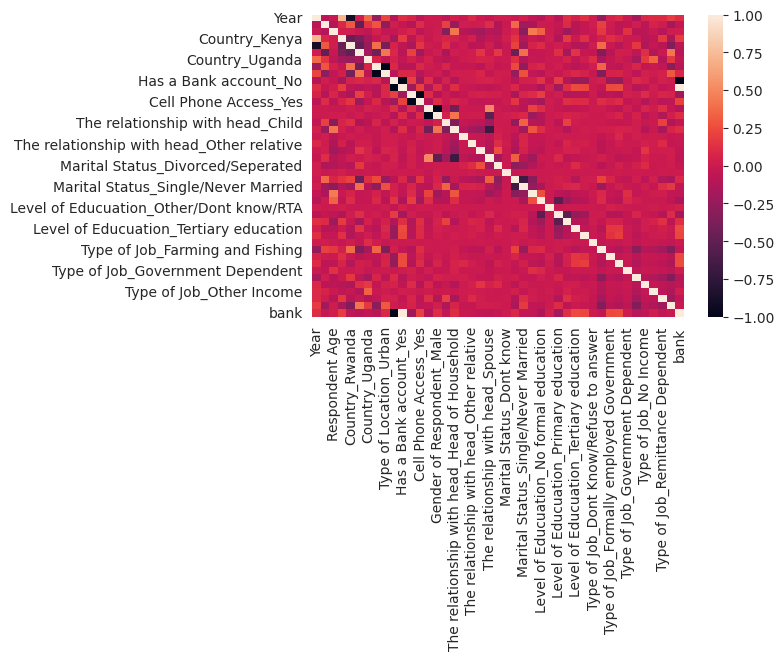

In [ ]:
plt.figure(dpi = 100)
sns.heatmap(df4.corr())

In [ ]:


X = df4[['Country_Kenya','Country_Rwanda','Country_Tanzania','Country_Uganda',
         'Type of Location_Rural','Type of Location_Urban','Has a Bank account_No','Has a Bank account_Yes',
          'Cell Phone Access_No','Cell Phone Access_Yes',                                 
          'Gender of Respondent_Female','Gender of Respondent_Male',                                
          'The relationship with head_Child',                     
          'The relationship with head_Head of Household',         
          'The relationship with head_Other non-relatives',       
          'The relationship with head_Other relative',     
          'The relationship with head_Parent',          
          'The relationship with head_Spouse',                  
          'Marital Status_Divorced/Seperated',                   
          'Marital Status_Dont know',                  
          'Marital Status_Married/Living together',              
          'Marital Status_Single/Never Married',              
          'Marital Status_Widowed',                 
          'Level of Educuation_No formal education',              
          'Level of Educuation_Other/Dont know/RTA',             
          'Level of Educuation_Primary education', 'Level of Educuation_Secondary education',               
          'Level of Educuation_Tertiary education',        
          'Level of Educuation_Vocational/Specialised training',
          'Type of Job_Dont Know/Refuse to answer',
          'Type of Job_Farming and Fishing',             
          'Type of Job_Formally employed Government',             
          'Type of Job_Formally employed Private','Type of Job_Government Dependent',                       
          'Type of Job_Informally employed',              
          'Type of Job_No Income',                     
          'Type of Job_Other Income',                            
          'Type of Job_Remittance Dependent','Type of Job_Self employed']]
y = df4['bank']

In [ ]:
# First we split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [ ]:
#mporting Linear Regression model from sklearn


from sklearn.linear_model import LinearRegression


In [ ]:
#we create and train the model by fitting the linear regression model on the training data.

lm = LinearRegression()

results = lm.fit(X_train,y_train)

In [ ]:
predictions = lm.predict(X_test)

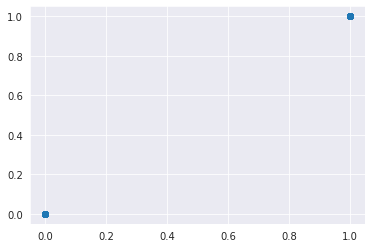

In [ ]:
# visualising the prediction

plt.scatter(y_test, predictions)

In [ ]:

r2_score(y_test, predictions) 

1.0

In [ ]:
(lm.coef_, lm.intercept_) 

(array([-0.00911658, -0.00911658, -0.00911658, -0.00911658, -0.09509571,
        -0.09509571,  0.03016433,  1.03016433,  0.01397471,  0.01397471,
         0.01091546,  0.01091546, -0.10000839, -0.10000839, -0.10000839,
        -0.10000839, -0.10000839, -0.10000839,  0.03583553,  0.03583553,
         0.03583553,  0.03583553,  0.03583553,  0.03082957,  0.03082957,
         0.03082957,  0.03082957,  0.03082957,  0.03082957, -0.00287837,
        -0.00287837, -0.00287837, -0.00287837, -0.00287837, -0.00287837,
        -0.00287837, -0.00287837, -0.00287837, -0.00287837]),
 0.08537945658659547)

In [ ]:

X2 = sm.add_constant(X.values)  
model = sm.OLS(y, X2).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   bank   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.988e+08
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:05:07   Log-Likelihood:             1.3859e+05
No. Observations:               22818   AIC:                        -2.771e+05
Df Residuals:                   22787   BIC:                        -2.769e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0395   4.16e+08   9.49e-11      1.0

##4. Solution implementation


In [ ]:
wssddd

##5. Challenging the solution